In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import kurtosis, skew # it's to explore some statistics of numerical values
from scipy import stats
%matplotlib inline

## Function def

In [125]:
def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(data = df.dtypes, columns=['dtypes']) # here we are telling that summary columns dataType should be 
    summary = summary.reset_index()                          # same as df 
    summary['Name'] = summary['index'] # index has column names like country, description, etc.. 
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.loc[0].values
    summary['Second Value'] = df.loc[1].values
    summary['Third Value'] = df.loc[2].values

    for name in summary['Name'].value_counts().index:
        summary.loc[summary['Name'] == name, 'Entropy'] = round(stats.entropy(df[name].value_counts(normalize=True), base=2),2) 

    return summary

def CalcOutliers(df_num): 
    
    mean, std = np.mean(df_num), np.std(df_num)
    
    cut = std*3
    
    lower, higher = mean-cut, mean+cut
    
    outlier_lower = [x for x in df_num if x < lower]
    
    outlier_higher = [x for x in df_num if x > higher]
    
    outlier_total = outlier_lower + outlier_higher
    
    print(f"Identified lower outliers: {len(outlier_lower)}")
    print(f"Identified higher outliers: {len(outlier_higher)}")
    print(f"Total Identified outliers: {len(outlier_total)}")
    print(f"Non outliers Observation: {len(df_num) - len(outlier_total)}")
    print(f"Outliers Percentage: {round(len(outlier_total)*100/len(df_num), 4)}")

    return

In [126]:
data = pd.read_csv('winemag-data-130k-v2.csv')

In [127]:
resumetable(data)

Dataset Shape: (129971, 13)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value,Entropy
0,country,object,63,43,Italy,Portugal,US,2.77
1,description,object,0,119955,"Aromas include tropical fruit, broom, brimston...","This is ripe and fruity, a wine that is smooth...","Tart and snappy, the flavors of lime flesh and...",16.83
2,designation,object,37465,37979,Vulkà Bianco,Avidagos,NaN,13.83
3,points,int64,0,21,87,87,87,3.64
4,price,float64,8996,390,NaN,15.0,14.0,5.77
5,province,object,63,425,Sicily & Sardinia,Douro,Oregon,5.05
6,region_1,object,21247,1229,Etna,NaN,Willamette Valley,7.89
7,region_2,object,79460,17,NaN,NaN,Willamette Valley,3.28
8,taster_name,object,26244,19,Kerin O’Keefe,Roger Voss,Paul Gregutt,3.39
9,taster_twitter_handle,object,31213,15,@kerinokeefe,@vossroger,@paulgwine,3.23


In [128]:
# The function describe is focused on numerical features
# in this case are points and price
print("Statistics of numerical data: ")
print(data.describe())

Statistics of numerical data: 
              points          price
count  129971.000000  120975.000000
mean       88.447138      35.363389
std         3.039730      41.022218
min        80.000000       4.000000
25%        86.000000      17.000000
50%        88.000000      25.000000
75%        91.000000      42.000000
max       100.000000    3300.000000


Text(0, 0.5, 'Count')

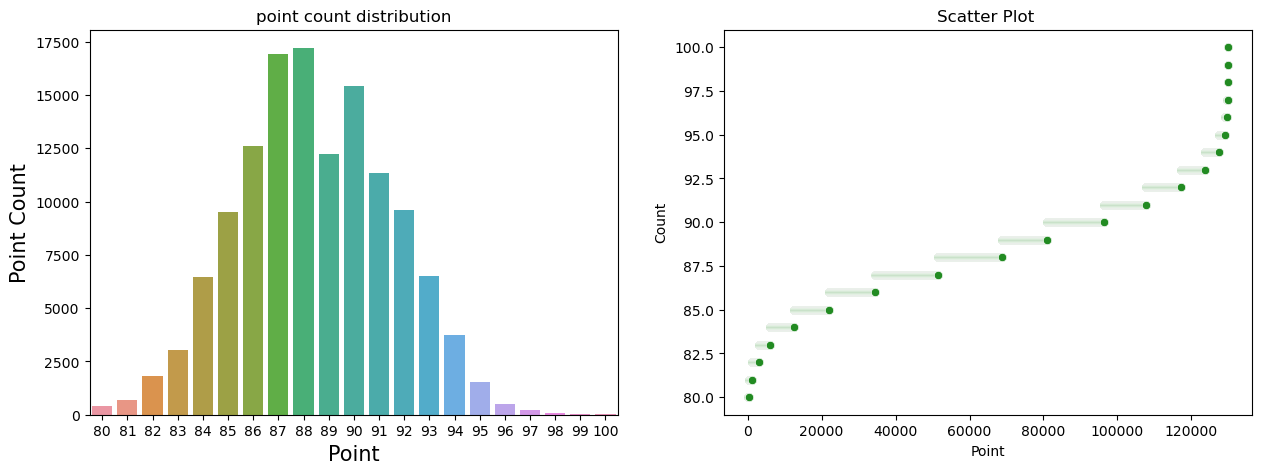

In [129]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1) # ) # this will create a grid of 1 row and 2 columns; this is the first graphic

g = sns.countplot(x="points", data=data)
g.set_title("point count distribution")
g.set_xlabel("Point", fontsize=15)
g.set_ylabel("Point Count", fontsize=15)

plt.subplot(1,2,2) # this is the second graphic
g = sns.scatterplot(range(data.shape[0]), np.sort(data.points.values), data=data, color='forestgreen')
g.set_title("Scatter Plot ")
g.set_xlabel("Point")
g.set_ylabel("Count")


We can clearly see the distribuitioon of the data. It seems very similar with a normal distribution.

Just a few number of wines have less than 82 points and more than 95 points.

As Points are one of the most important metrics in this dataset, I will explore it furthuer more.

I will find for more important informations like quantiles and maybe try to set wines in categories based on it

In [130]:
data['rating_point'] = 0
data.loc[ (data['points']>=80) & (data['points']<83) , "rating_point"] = 0
data.loc[ (data['points']>=83) & (data['points']<87) , "rating_point"] = 1
data.loc[ (data['points']>=87) & (data['points']<90) , "rating_point"] = 2
data.loc[ (data['points']>=90) & (data['points']<94) , "rating_point"] = 3
data.loc[ (data['points']>=94) & (data['points']<98) , "rating_point"] = 4
data.loc[ (data['points']>=98) , "rating_point"] = 5

data.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,rating_point
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,2
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2


### Ploting Rating categories
Let's see the distribution after the transformation

Text(0, 0.5, 'Count')

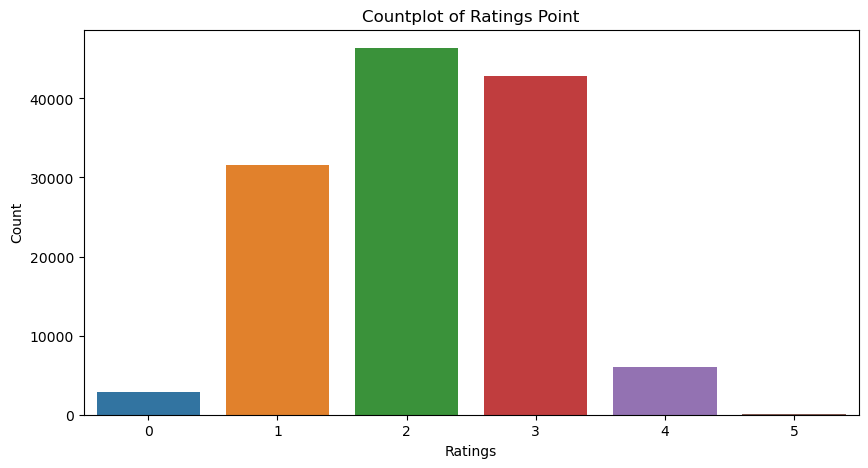

In [161]:
plt.figure(figsize=(10,5))

g = sns.countplot(x='rating_point', data=data)
g.set_title("Countplot of Ratings Point")
g.set_xlabel("Ratings")
g.set_ylabel("Count")

In [132]:
CalcOutliers(data['points'])

Identified lower outliers: 0
Identified higher outliers: 129
Total Identified outliers: 129
Non outliers Observation: 129842
Outliers Percentage: 0.0993


Very interesting informations!

We can see that all outliers of this feature is in upper values.

Also, we have less than 0,01% of outlier values in points.... Just 129 wines have more than 98 points.

We will apply it on Price too... Let's start the understanding of it now.

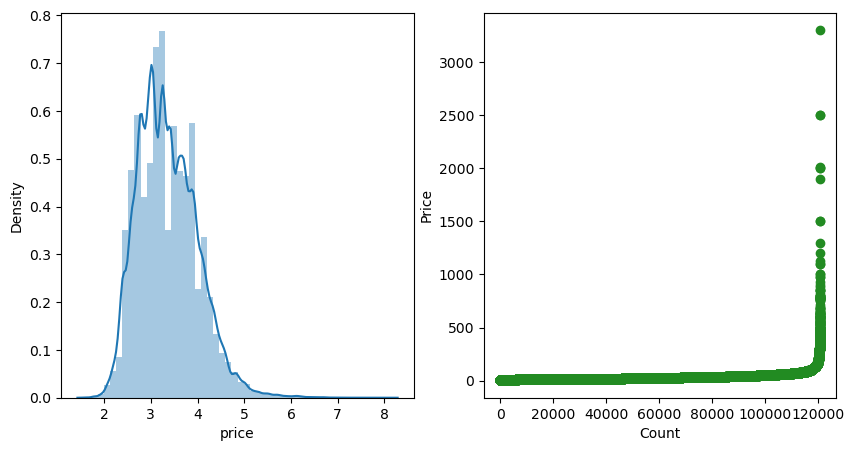

In [133]:
plt.figure(figsize=(10, 5))

plt.subplot(121)
g = sns.distplot(np.log(data.price.dropna()+1))

plt.subplot(122)
plt.scatter(range(data.shape[0]), np.sort(data.price.values), color='forestgreen') # for every range of value we are giving
plt.xlabel("Count")
plt.ylabel("Price")
plt.show()                                                             #price and drawing scatterplot

Nice!!! The Price Log give us an impression that the data could normaly distributed, but like in points, we need to test.



In [134]:
CalcOutliers(data.price)

Identified lower outliers: 0
Identified higher outliers: 1177
Total Identified outliers: 1177
Non outliers Observation: 128794
Outliers Percentage: 0.9056


In [135]:
data['price_log'] = np.log(data.price)


### Crossing prices and Points


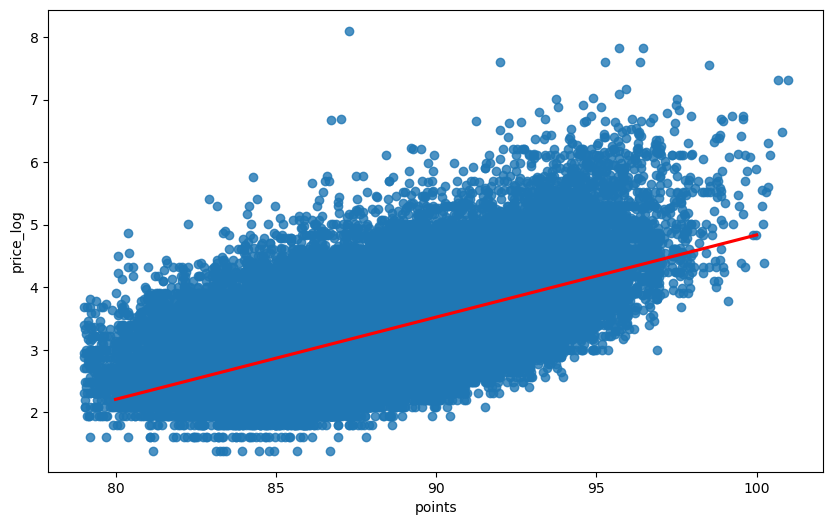

In [136]:
plt.figure(figsize=(10,6))
g = sns.regplot(x='points', y = 'price_log', data=data, x_jitter=True,
                fit_reg=True, line_kws={"color":'red'})

## Country Feature

[Text(0, 0, 'Italy'),
 Text(1, 0, 'Portugal'),
 Text(2, 0, 'US'),
 Text(3, 0, 'Spain'),
 Text(4, 0, 'France'),
 Text(5, 0, 'Germany'),
 Text(6, 0, 'Argentina'),
 Text(7, 0, 'Chile'),
 Text(8, 0, 'Australia'),
 Text(9, 0, 'Austria'),
 Text(10, 0, 'South Africa'),
 Text(11, 0, 'New Zealand'),
 Text(12, 0, 'Israel'),
 Text(13, 0, 'Hungary'),
 Text(14, 0, 'Greece'),
 Text(15, 0, 'Romania'),
 Text(16, 0, 'Canada'),
 Text(17, 0, 'Turkey'),
 Text(18, 0, 'Uruguay'),
 Text(19, 0, 'Bulgaria')]

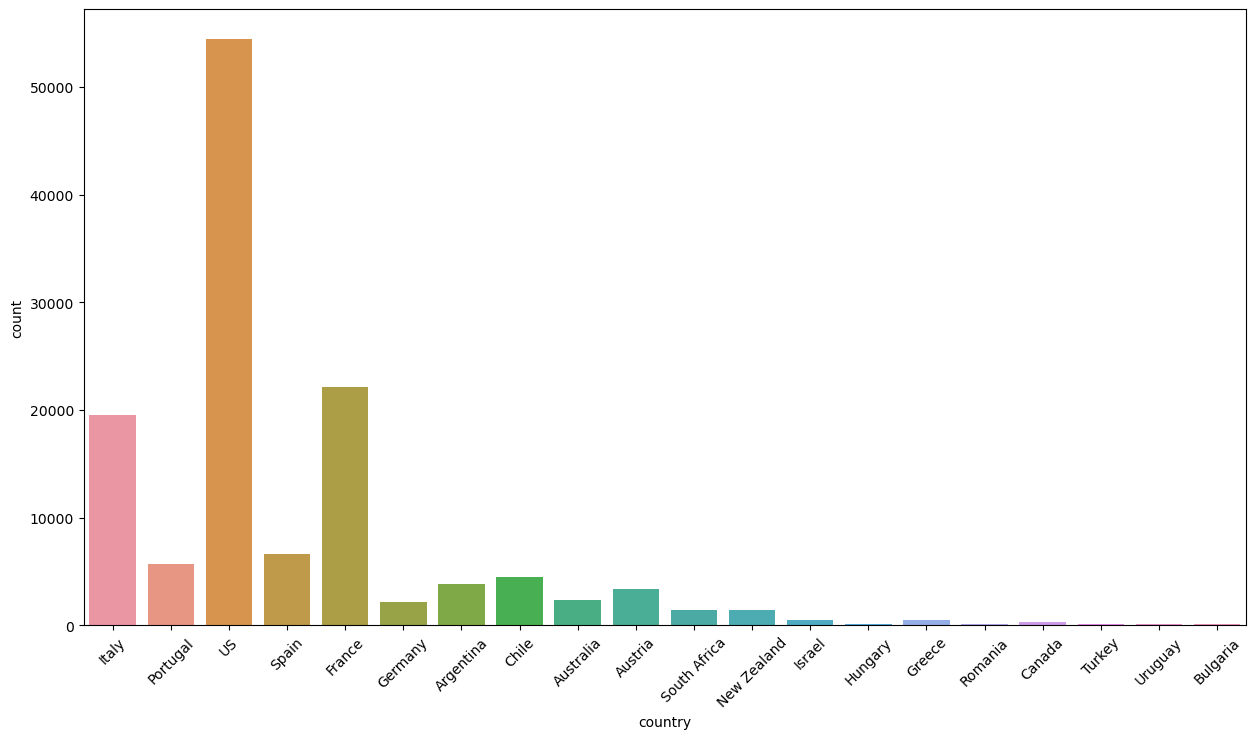

In [137]:
plt.figure(figsize=(15,8))
country =  data['country'].value_counts()[:20]
# print(country.index.values) # values and tolist are same as they get list inside of Index([.....]) 

# country.plot(kind='bar', color="forestgreen")
g = sns.countplot(x="country" , data=data[data.country.isin(country.index.tolist())])
g.set_xticklabels(g.get_xticklabels(), rotation=45)

Wow, very interesting distribuition. I was expecting to see Italy, Chile or Argentina as the biggest wine productor.
If you want take a better look, look the print output below

Now, I will take a look in the distribuition of this top 20 countrys by price and rating

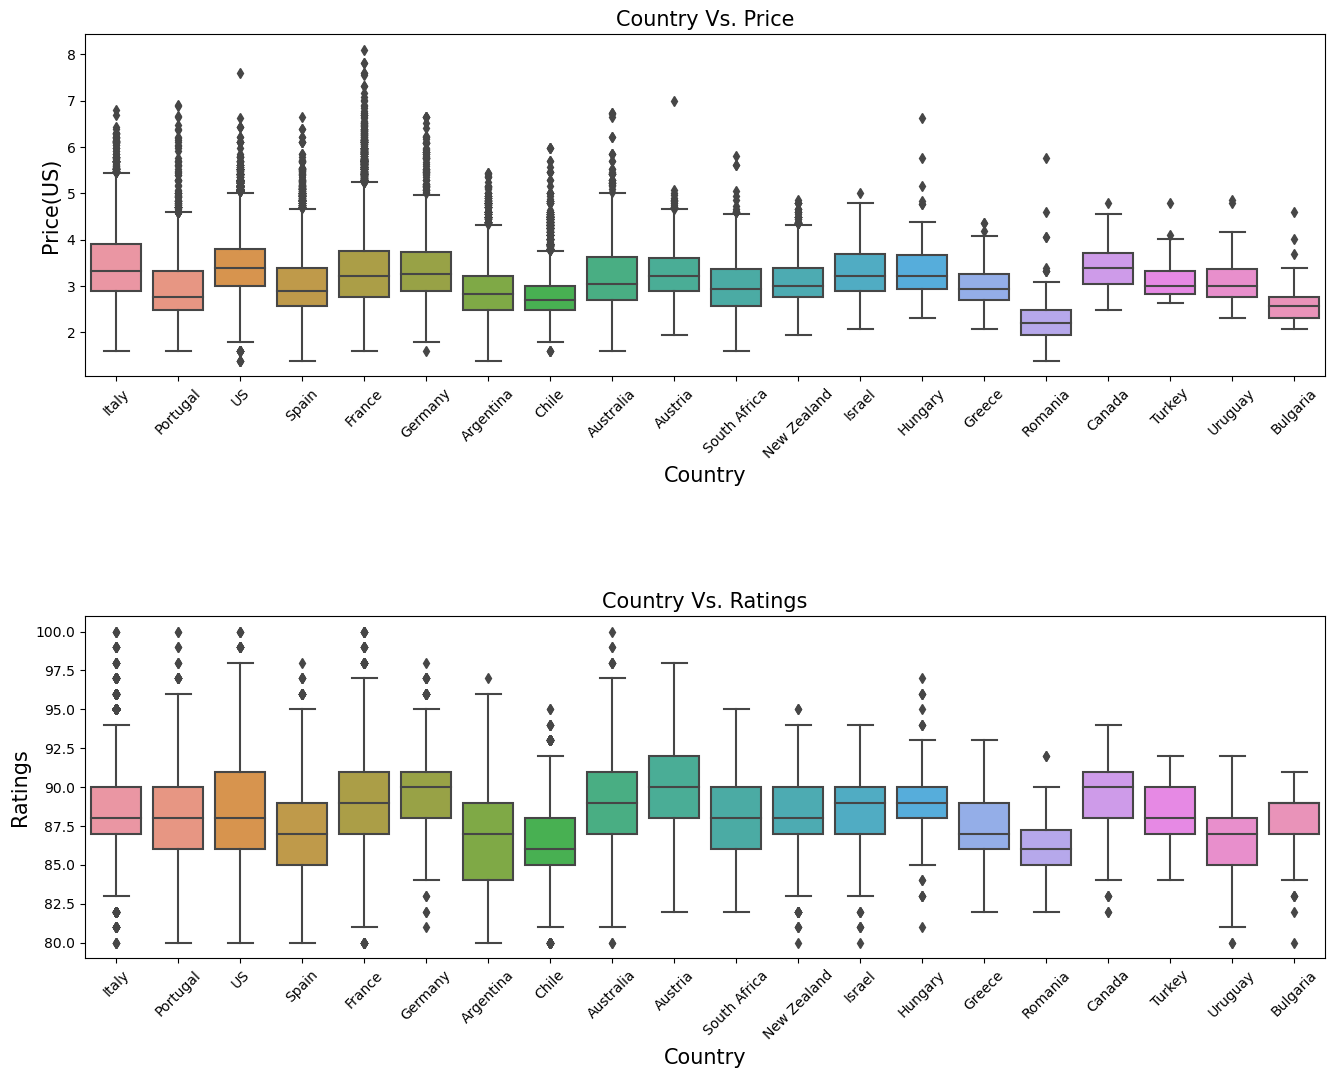

In [138]:
plt.figure(figsize=(16, 12))
plt.subplot(2, 1, 1)
g = sns.boxplot(x='country', y='price_log', data=data[data.country.isin(country.index.values)])
g.set_xlabel("Country", fontsize=15)
g.set_ylabel("Price(US)", fontsize=15)
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Country Vs. Price", fontsize=15)

plt.subplot(2, 1, 2)
g1 = sns.boxplot(x='country', y='points', data=data[data.country.isin(country.index.values)])
g1.set_xlabel("Country", fontsize=15)
g1.set_ylabel("Ratings", fontsize=15)
g1.set_title("Country Vs. Ratings", fontsize=15)
g1.set_xticklabels(g1.get_xticklabels(), rotation=45)

plt.subplots_adjust(hspace = 0.7)


## Province Exploration

0


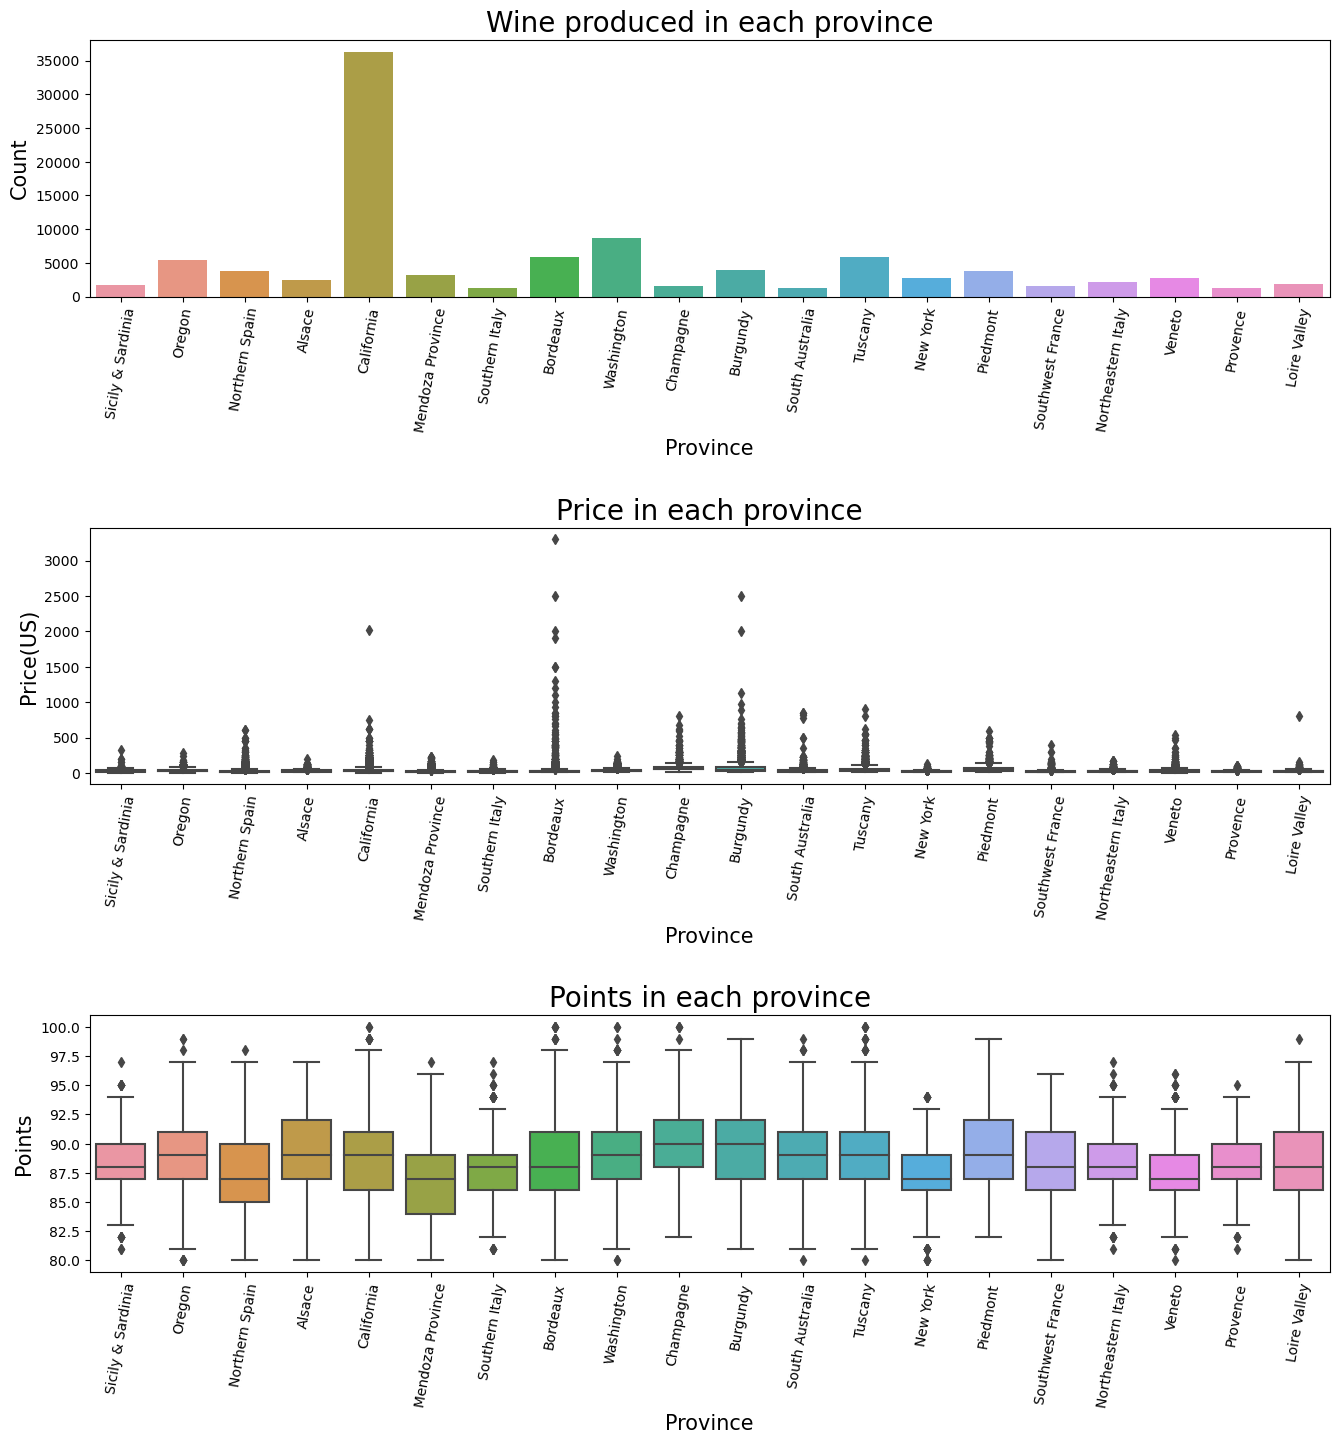

In [139]:
plt.figure(figsize = (16,16))
prov = data['province'].value_counts()

plt.subplot(3,1,1)
print(prov.isnull().sum())
g = sns.countplot(x = 'province', data =data[data.province.isin(prov[:20].index.values)])
g.set_xlabel("Province", fontsize=15)
g.set_ylabel("Count", fontsize=15)
g.set_title("Wine produced in each province", fontsize=20)
g.set_xticklabels(g.get_xticklabels(), rotation=80)

plt.subplot(3,1,2)
g1 = sns.boxplot(x='province', y='price',  data=data[data.province.isin(prov[0:20].index.values)])
g1.set_xlabel("Province", fontsize=15)
g1.set_ylabel("Price(US)", fontsize=15)
g1.set_title("Price in each province", fontsize=20)
g1.set_xticklabels(g1.get_xticklabels(), rotation=80)

plt.subplot(3,1,3)
g1 = sns.boxplot(x='province', y='points',  data=data[data.province.isin(prov[0:20].index.values)])
g1.set_xlabel("Province", fontsize=15)
g1.set_ylabel("Points", fontsize=15)
g1.set_title("Points in each province", fontsize=20)
g1.set_xticklabels(g1.get_xticklabels(), rotation=80)

plt.subplots_adjust(hspace=0.9)

## Taster Feature

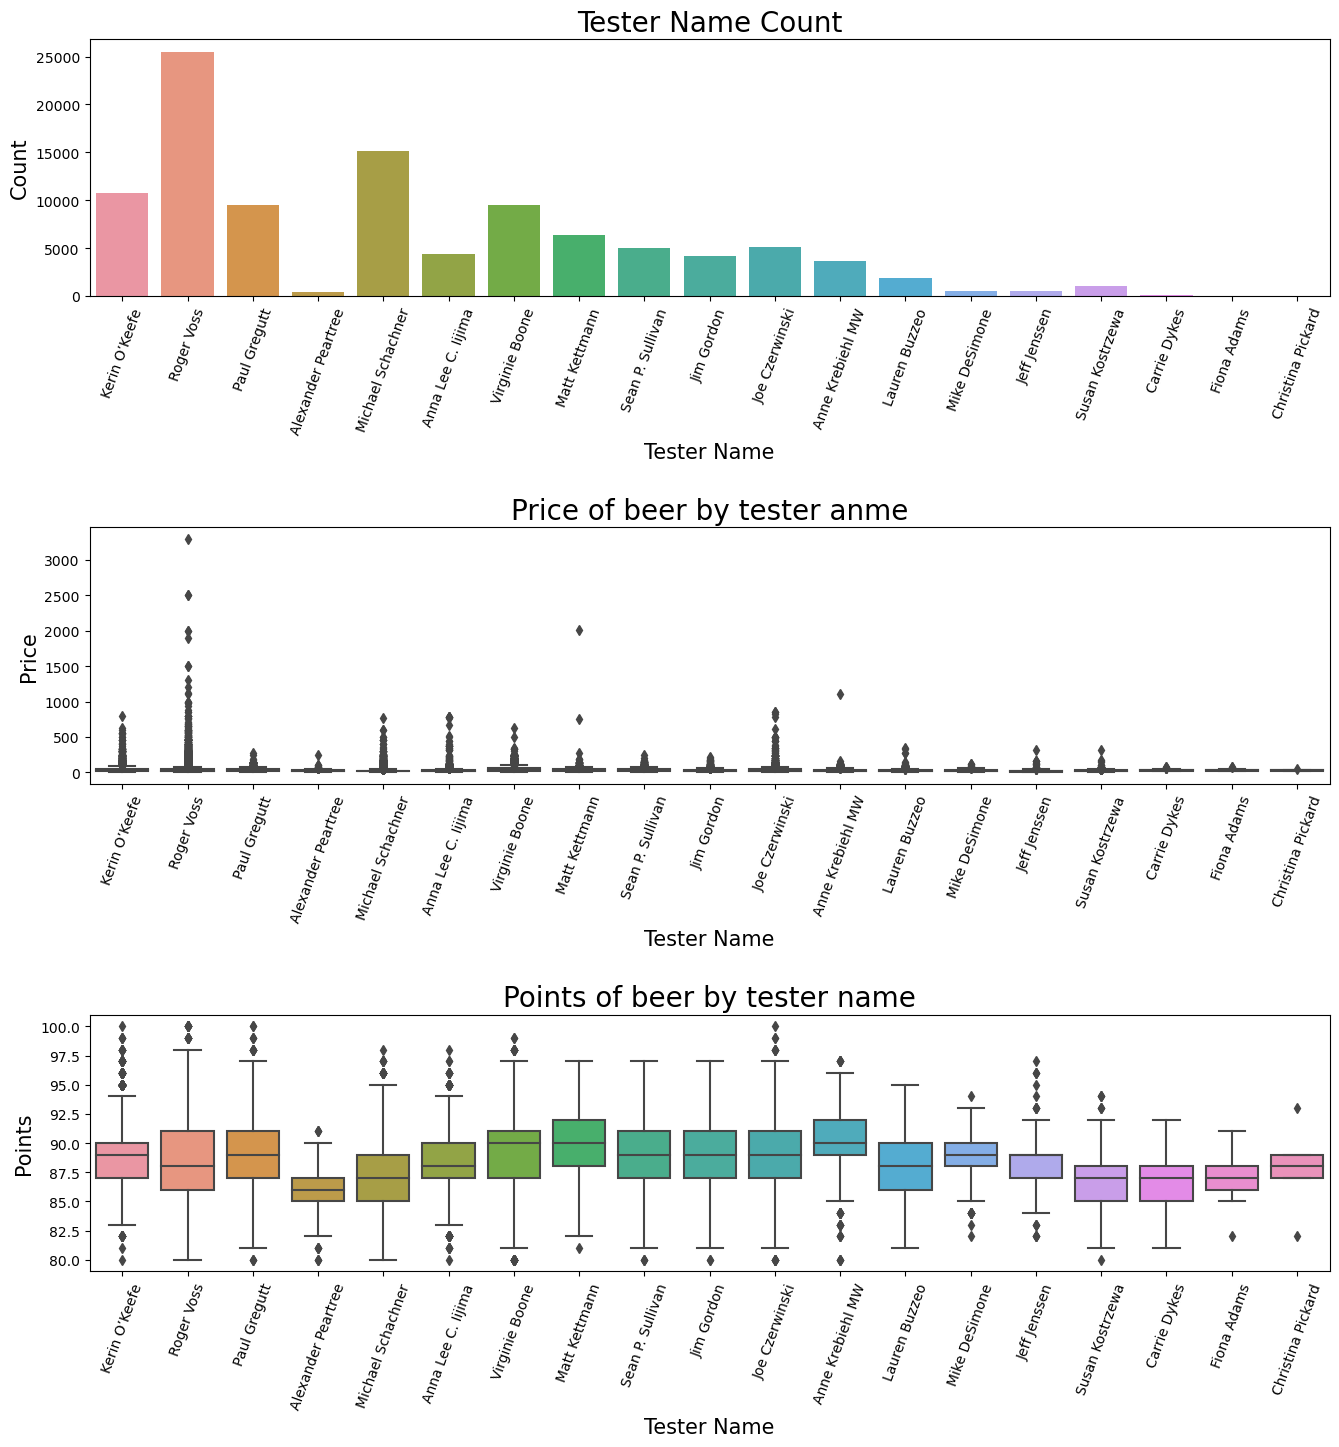

In [140]:
plt.figure(figsize=(16,16))
tester = data.taster_name.value_counts()[:20]

plt.subplot(3,1,1)
g = sns.countplot(x='taster_name', data=data[data.taster_name.isin(tester.index.values)])
g.set_xlabel("Tester Name", fontsize=15)
g.set_ylabel("Count", fontsize=15)
g.set_title("Tester Name Count", fontsize=20)
g.set_xticklabels(g.get_xticklabels(), rotation = 70)

plt.subplot(3,1,2)
g = sns.boxplot(x='taster_name', y ='price', data=data[data.taster_name.isin(tester.index.values)])
g.set_xlabel("Tester Name", fontsize=15)
g.set_ylabel("Price", fontsize=15)
g.set_title("Price of beer by tester anme", fontsize=20)
g.set_xticklabels(g.get_xticklabels(), rotation = 70)

plt.subplot(3,1,3)
g = sns.boxplot(x='taster_name', y ='points', data=data[data.taster_name.isin(tester.index.values)])
g.set_xlabel("Tester Name", fontsize=15)
g.set_ylabel("Points", fontsize=15)
g.set_title("Points of beer by tester name", fontsize=20)
g.set_xticklabels(g.get_xticklabels(), rotation = 70)

plt.subplots_adjust(hspace=0.9)

## VARIETY FEATURE

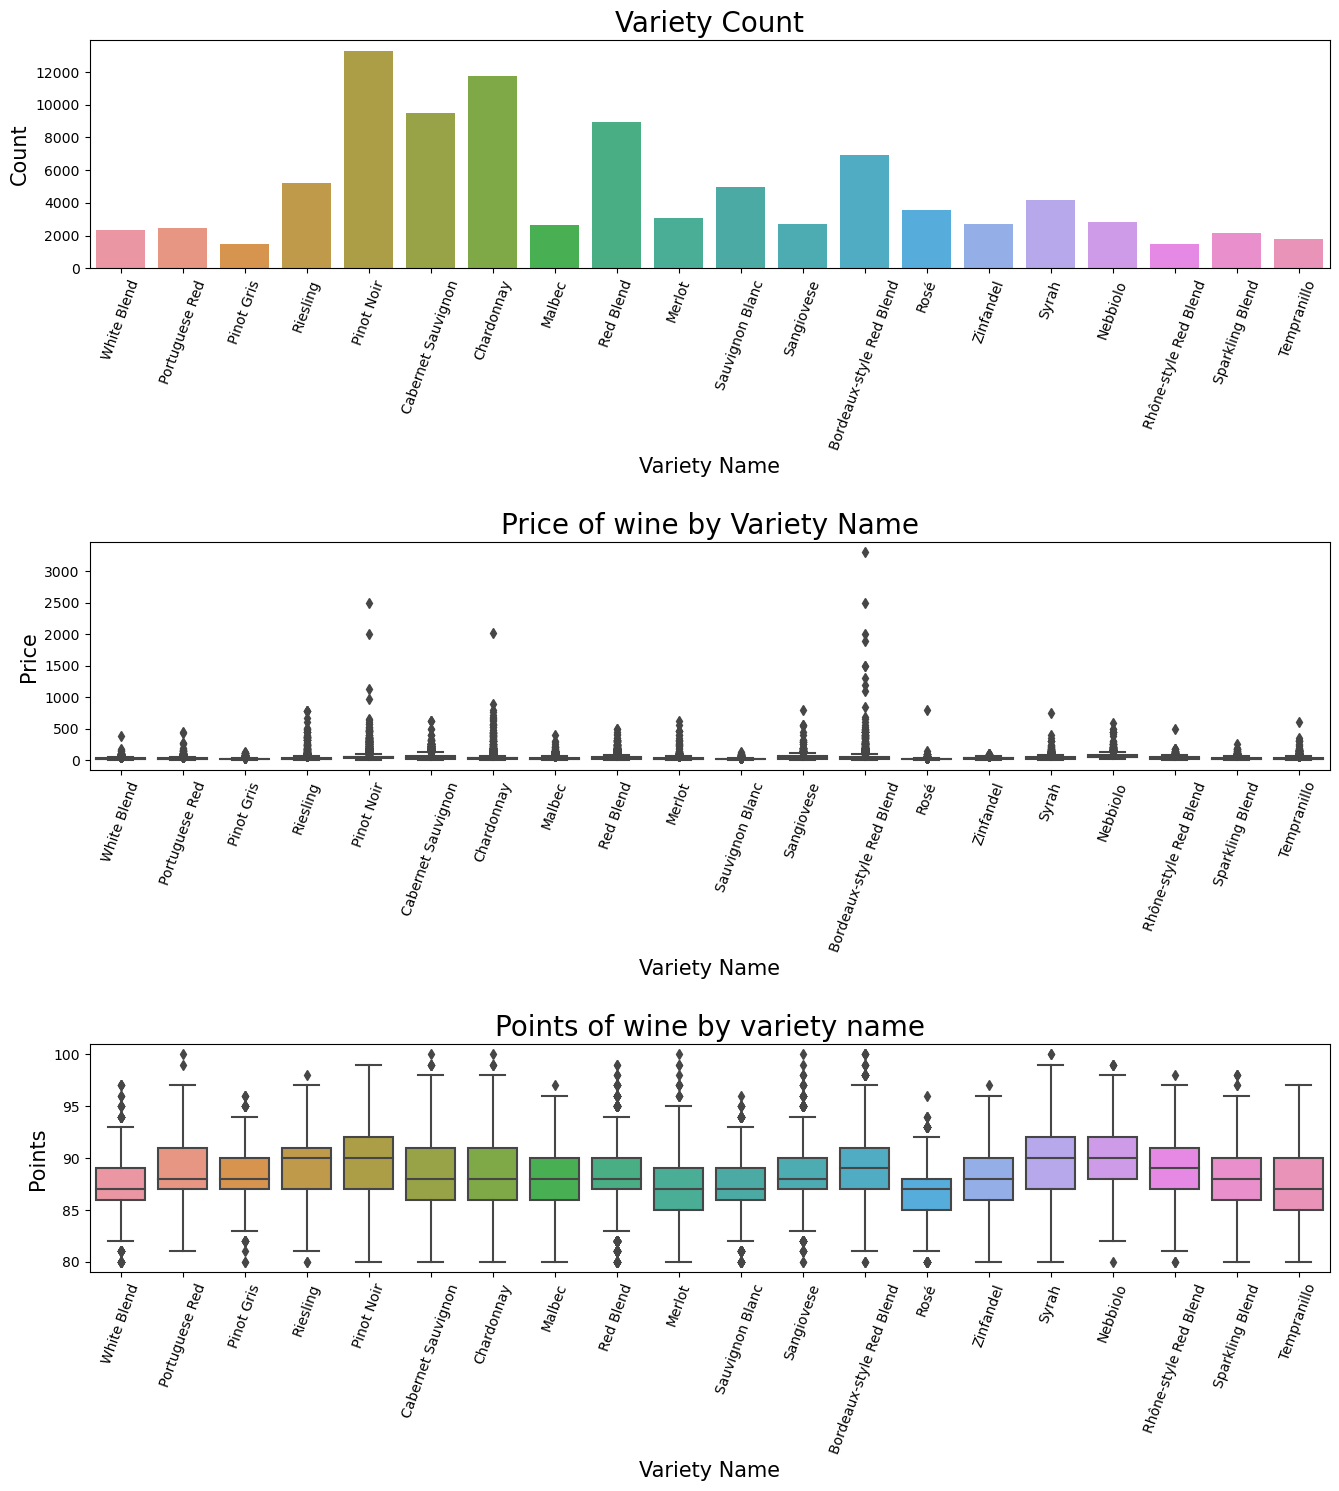

In [141]:
plt.figure(figsize=(16,16))
variety = data.variety.value_counts()[:20]

plt.subplot(3,1,1)
g = sns.countplot(x='variety', data=data[data.variety.isin(variety.index.values)])
g.set_xlabel("Variety Name", fontsize=15)
g.set_ylabel("Count", fontsize=15)
g.set_title("Variety Count", fontsize=20)
g.set_xticklabels(g.get_xticklabels(), rotation = 70)

plt.subplot(3,1,2)
g = sns.boxplot(x='variety', y ='price', data=data[data.variety.isin(variety.index.values)])
g.set_xlabel("Variety Name", fontsize=15)
g.set_ylabel("Price", fontsize=15)
g.set_title("Price of wine by Variety Name", fontsize=20)
g.set_xticklabels(g.get_xticklabels(), rotation = 70)

plt.subplot(3,1,3)
g = sns.boxplot(x='variety', y ='points', data=data[data.variety.isin(variety.index.values)])
g.set_xlabel("Variety Name", fontsize=15)
g.set_ylabel("Points", fontsize=15)
g.set_title("Points of wine by variety name", fontsize=20)
g.set_xticklabels(g.get_xticklabels(), rotation = 70)

plt.subplots_adjust(hspace=1.2)

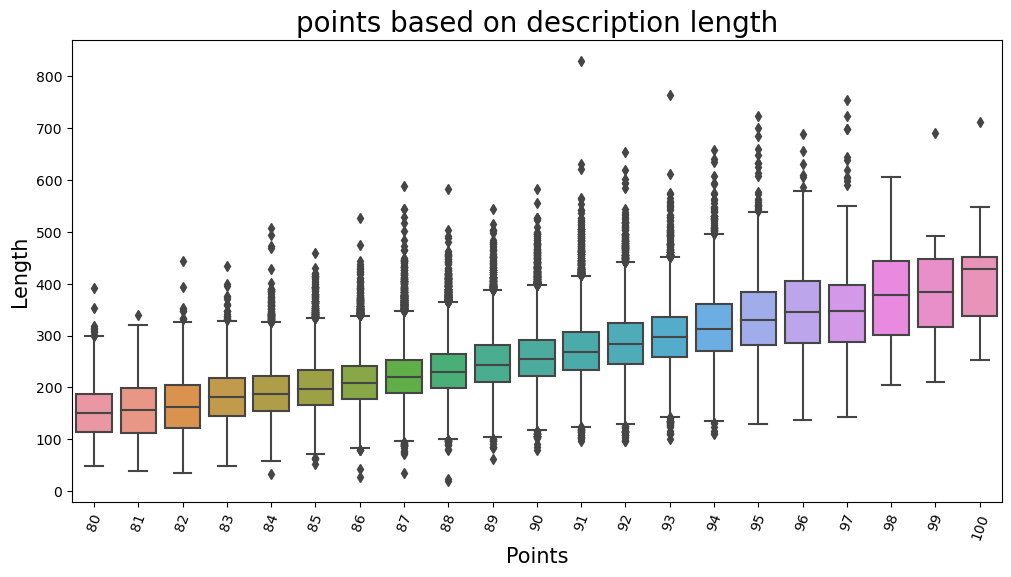

In [164]:
# calculate the lenth of description/review and put it into new column
data['desc_len'] = data['description'].apply(len)

plt.figure(figsize=(12,6))

g = sns.boxplot(x='points', y='desc_len', data=data)
g.set_xlabel("Points", fontsize=15)
g.set_ylabel("Length", fontsize=15)
g.set_title("points based on description length", fontsize=20)
g.set_xticklabels(g.get_xticklabels(), rotation = 70)
plt.show()

Very cool! We can see that the wine's with highest points also have the biggest descriptions length. It's very interesting to understand.



### Scatter plot of the description length and the price

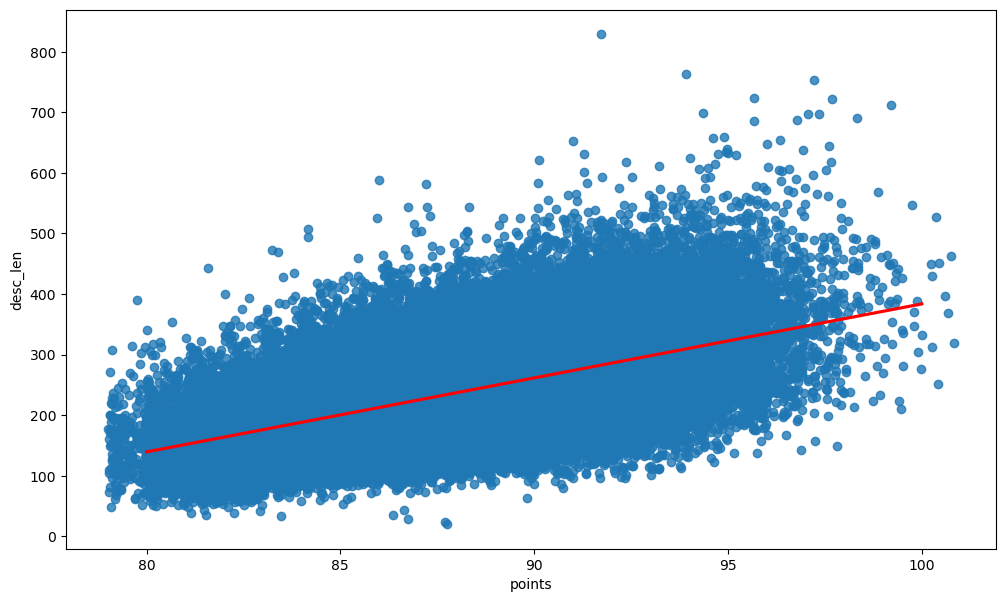

In [176]:
plt.figure(figsize=(12,7))

g = sns.regplot(x='points', y='desc_len', x_jitter=True, fit_reg=True, line_kws={"color":"red"}, data=data)

plt.show()

## Sentiment Analysis

In [178]:
!pip install nltk

In [182]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

SIA = SentimentIntensityAnalyzer()

# Applying Model, Variable Creation
sentiment = data.sample(15000).copy()
sentiment['polarity_score']=sentiment.description.apply(lambda x:SIA.polarity_scores(x)['compound'])
sentiment['neutral_score']=sentiment.description.apply(lambda x:SIA.polarity_scores(x)['neu'])
sentiment['negative_score']=sentiment.description.apply(lambda x:SIA.polarity_scores(x)['neg'])
sentiment['positive_score']=sentiment.description.apply(lambda x:SIA.polarity_scores(x)['pos'])

sentiment['sentiment']= np.nan
sentiment.loc[sentiment.polarity_score>0,'sentiment']='POSITIVE'
sentiment.loc[sentiment.polarity_score==0,'sentiment']='NEUTRAL'
sentiment.loc[sentiment.polarity_score<0,'sentiment']='NEGATIVE'

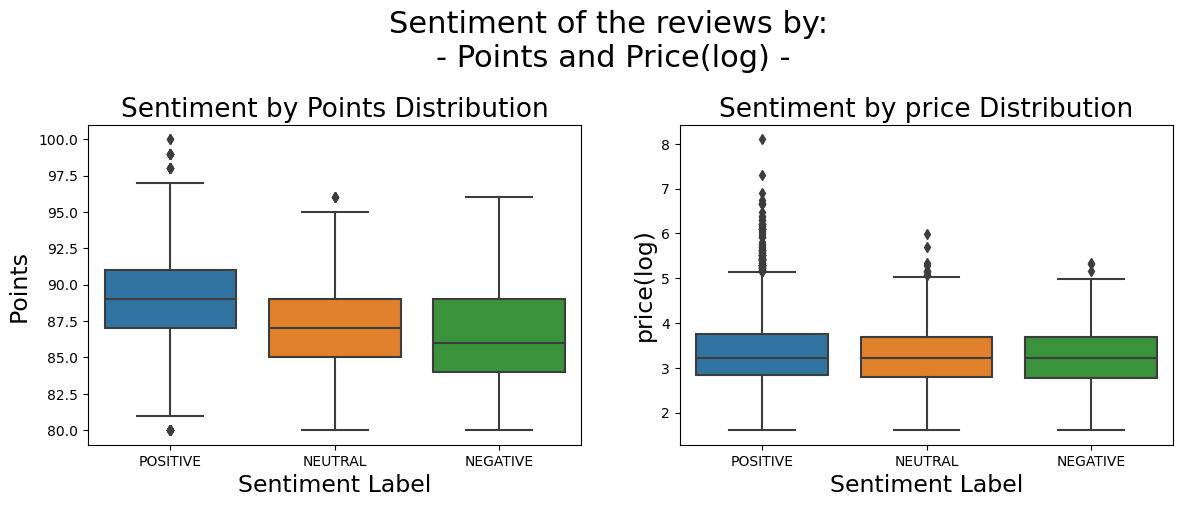

In [192]:
plt.figure(figsize=(14,5))

plt.suptitle('Sentiment of the reviews by: \n- Points and Price(log) -', size=22)

plt.subplot(1,2,1)
ax = sns.boxplot(x='sentiment', y='points', data=sentiment)
ax.set_title("Sentiment by Points Distribution", fontsize=19)
ax.set_ylabel("Points ", fontsize=17)
ax.set_xlabel("Sentiment Label", fontsize=17)

plt.subplot(1,2,2)
ax = sns.boxplot(x='sentiment', y='price_log', data=sentiment)
ax.set_title("Sentiment by price Distribution", fontsize=19)
ax.set_ylabel("price(log)", fontsize=17)
ax.set_xlabel("Sentiment Label", fontsize=17)

plt.subplots_adjust(top = 0.75, wspace=.2)